In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests

In [3]:
def download(url, filename):
    response=requests.get(url)
    if response.status_code==200:
        with open(filename, "wb") as f:
            f.write(response.content)

file_path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
download(file_path, "usedcars.csv")

In [4]:
file_name="usedcars.csv"

In [5]:
df=pd.read_csv(file_path, header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,...,9.0,111.0,5000.0,21,27,13495.0,11.190476190476188,Medium,0,1
2,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,...,9.0,111.0,5000.0,21,27,16500.0,11.190476190476188,Medium,0,1
3,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.8226814031715521,...,9.0,154.0,5000.0,19,26,16500.0,12.36842105263158,Medium,0,1
4,2,164,audi,std,four,sedan,fwd,front,99.8,0.8486304661220567,...,10.0,102.0,5500.0,24,30,13950.0,9.791666666666666,Medium,0,1


In [7]:
#Set first row as new header
new_header=df.iloc[0]
df=df[1:]
df.columns=new_header
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,...,9.0,111.0,5000.0,21,27,13495.0,11.190476190476188,Medium,0,1
2,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,...,9.0,111.0,5000.0,21,27,16500.0,11.190476190476188,Medium,0,1
3,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.8226814031715521,...,9.0,154.0,5000.0,19,26,16500.0,12.36842105263158,Medium,0,1
4,2,164,audi,std,four,sedan,fwd,front,99.8,0.8486304661220567,...,10.0,102.0,5500.0,24,30,13950.0,9.791666666666666,Medium,0,1
5,2,164,audi,std,four,sedan,4wd,front,99.4,0.8486304661220567,...,8.0,115.0,5500.0,18,22,17450.0,13.055555555555555,Medium,0,1


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#list data types for each column
df.dtypes

0
symboling            object
normalized-losses    object
make                 object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
wheel-base           object
length               object
width                object
height               object
curb-weight          object
engine-type          object
num-of-cylinders     object
engine-size          object
fuel-system          object
bore                 object
stroke               object
compression-ratio    object
horsepower           object
peak-rpm             object
city-mpg             object
highway-mpg          object
price                object
city-L/100km         object
horsepower-binned    object
diesel               object
gas                  object
dtype: object

In [10]:
#What is the data type of the column "peak-rpm"?
df['peak-rpm'].dtypes

dtype('O')

In [11]:
#can calculate the correlation between variables of type "int64" or "float64" using the method "corr"
# df.corr()

In [12]:
#Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
0,,,,
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000



Positive Linear Relationship

In [13]:
df[["engine-size","price"]]=df[["engine-size", "price"]].astype("float")

(0.0, 53388.41931301862)

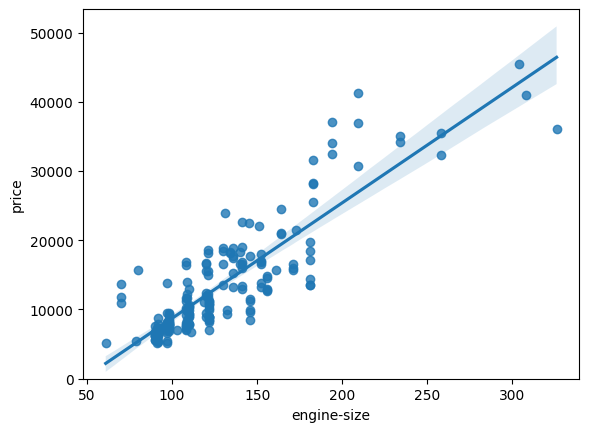

In [14]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [15]:
df[["engine-size", "price"]].corr()

,engine-size,price
0,,
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [16]:
#Changing datatype
df[["highway-mpg"]]=df[["highway-mpg"]].astype("float")

<Axes: xlabel='highway-mpg', ylabel='price'>

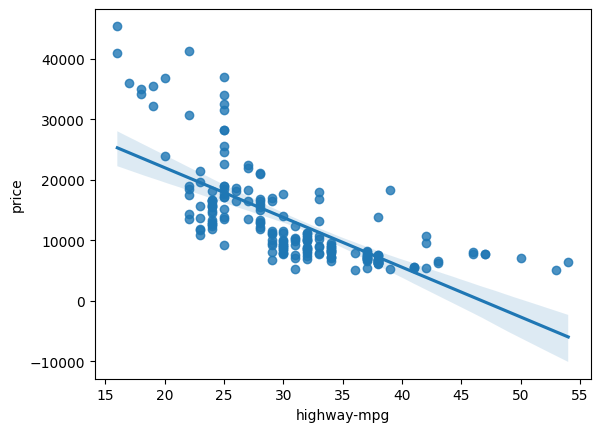

In [17]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [18]:
df[['highway-mpg' ,'price']].corr()

,highway-mpg,price
0,,
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


Weak Linear Relationship

In [19]:
df[["peak-rpm"]]=df[["peak-rpm"]].astype("float")

<Axes: xlabel='peak-rpm', ylabel='price'>

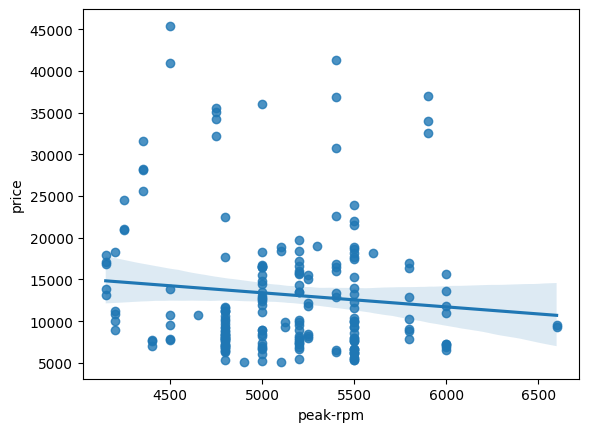

In [20]:
sns.regplot(x="peak-rpm", y='price', data=df)

In [21]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
0,,
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Find the correlation between x="stroke" and y="price".

Hint: if you would like to select those columns, use the following syntax: df[["stroke","price"]]

In [22]:
df[['stroke']]=df[['stroke']].astype("float")

In [23]:
df[["stroke", "price"]].corr()

,stroke,price
0,,
stroke,1.00000,0.08231
price,0.08231,1.00000



Given the correlation results between "price" and "stroke", do you expect a linear relationship?

<Axes: xlabel='stroke', ylabel='price'>

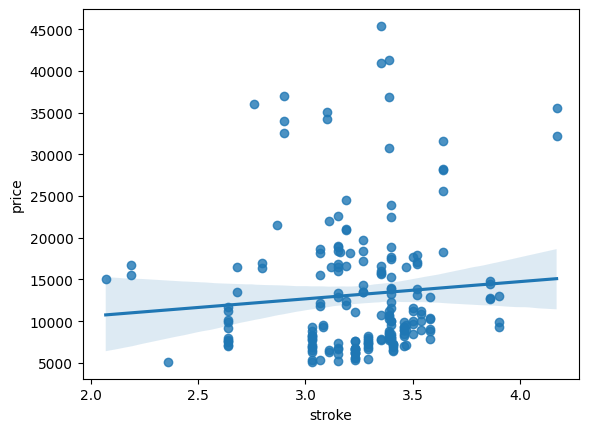

In [24]:
sns.regplot(x="stroke", y="price", data=df)

Categorical Variables

<Axes: xlabel='body-style', ylabel='price'>

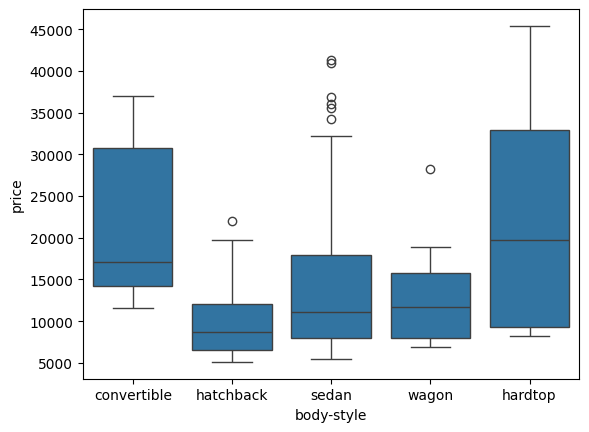

In [25]:
sns.boxplot(x="body-style", y="price", data=df)

<Axes: xlabel='engine-location', ylabel='price'>

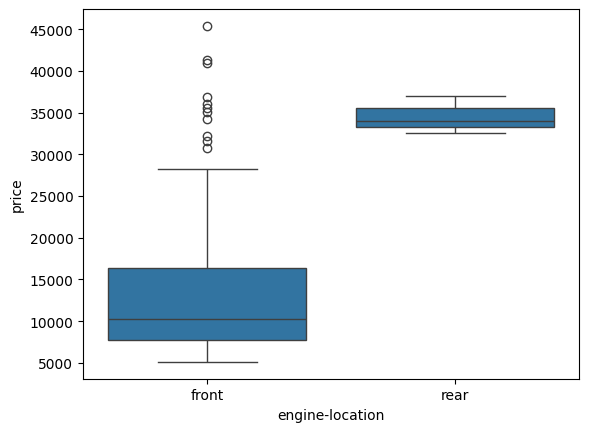

In [26]:
sns.boxplot(x="engine-location", y="price", data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

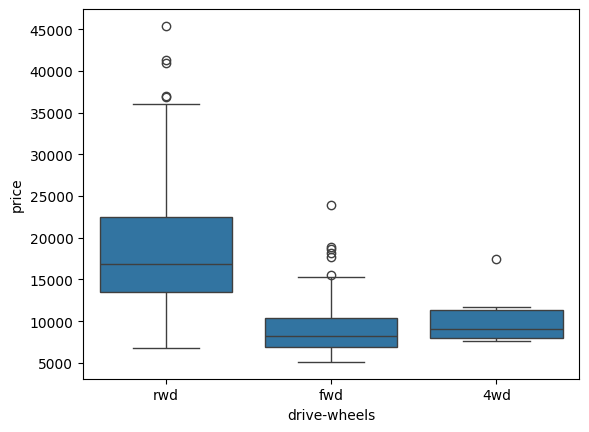

In [27]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Descriptive Statistical Analysis

In [28]:
df.describe()

,engine-size,stroke,peak-rpm,highway-mpg,price
count,201.000000,197.000000,201.000000,201.000000,201.000000
mean,126.875622,3.256904,5117.665368,30.686567,13207.129353
std,41.546834,0.319256,478.113805,6.815150,7947.066342
min,61.000000,2.070000,4150.000000,16.000000,5118.000000
25%,98.000000,3.110000,4800.000000,25.000000,7775.000000
50%,120.000000,3.290000,5125.369458,30.000000,10295.000000
75%,141.000000,3.410000,5500.000000,34.000000,16500.000000
max,326.000000,4.170000,6600.000000,54.000000,45400.000000


In [29]:
df.describe(include=['object'])

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,fuel-system,bore,compression-ratio,horsepower,city-mpg,city-L/100km,horsepower-binned,diesel,gas
count,201,201,201,201,201,201,201,201,201,201,...,201,201,201,201,201,201,201,200,201,201
unique,6,51,22,2,2,5,3,2,52,73,...,7,8,39,32,59,29,29,3,2,2
top,0,122,toyota,std,four,sedan,fwd,front,93.7,0.7558865929841423,...,four,mpfi,3.62,9.0,68.0,31,7.580645161290323,Low,0,1
freq,65,41,32,165,115,94,118,198,20,15,...,157,92,23,46,19,28,28,115,181,181


Value Counts

In [30]:
df[['drive-wheels']].value_counts()

drive-wheels
fwd             118
rwd              75
4wd               8
Name: count, dtype: int64

In [31]:
df['drive-wheels'].value_counts().to_frame() #converting series to dataframe

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [32]:
drive_wheels_counts=df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [33]:
drive_wheels_counts.index.name='drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [34]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


Basics of Grouping

In [35]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [36]:
df_group_one=df[['drive-wheels','body-style', 'price']]

In [37]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False)['price'].mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [38]:
#grouping results
df_gptest=df[['drive-wheels', 'body-style', 'price']]
grouped_test1= df_gptest.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


pivot table

In [39]:
grouped_pivot=grouped_test1.pivot(index='drive-wheels', columns='body-style')
grouped_pivot

0                  price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

0                           
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [40]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

0                  price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

0                           
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Use the "groupby" function to find the average "price" of each car based on "body-style".

In [41]:
#grouping results
df_gptest2= df[['body-style', 'price']]
grouped_test_bodystyle=df_gptest2.groupby(['body-style'],as_index=False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


Variables: Drive Wheels and Body Style vs. Price

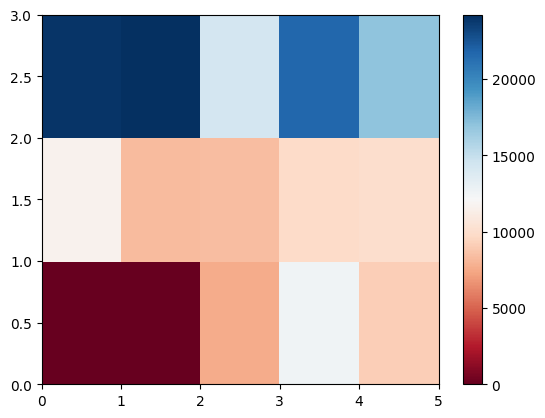

In [42]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The default labels convey no useful information to us. Let's change that:

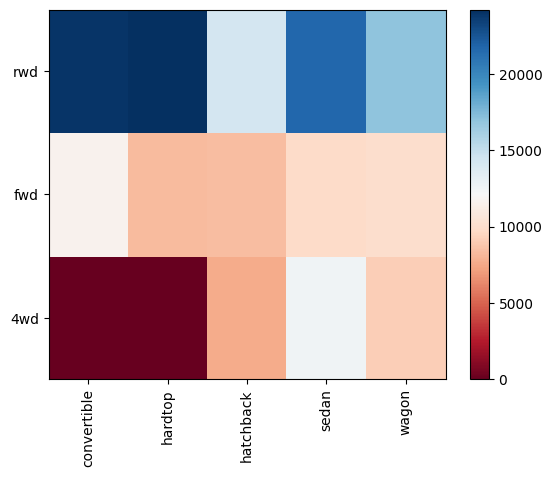

In [43]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Correlation and Causation

Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

In [44]:
#Pearson Correlation

# df.corr()

In [45]:
# P-Value

# p-value is 
#  0.001: we say there is strong evidence that the correlation is significant.
# the p-value is 
#  0.05: there is moderate evidence that the correlation is significant.
# the p-value is 
#  0.1: there is weak evidence that the correlation is significant.
# the p-value is 
#  0.1: there is no evidence that the correlation is significant.

In [46]:
from scipy import stats

In [47]:
df[['wheel-base']]=df[['wheel-base']].astype("float")


Wheel-Base vs. Price

In [48]:
pearson_coef, p_value=stats.pearsonr(df['wheel-base'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " With a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.5846418222655081  With a P-value of P =  8.076488270732947e-20


In [49]:
df[['horsepower']]=df[['horsepower']].astype=("float")


Length vs. Price

In [50]:
df[['length']]=df[['length']].astype('float')

In [51]:
pearson_coef,p_value=stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.6906283804483642  with a P-value of P =  8.016477466158917e-30


Width vs. Price

In [52]:
df[['width']]=df[['width']].astype('float')

In [53]:
pearson_coef,p_value=stats.pearsonr(df['width'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with the P=value of P =", p_value)

The Pearson Correlation Coefficient is 0.7512653440522673  with the P=value of P = 9.200335510482065e-38


Curb-Weight vs. Price

In [54]:
df[['curb-weight']]=df[['curb-weight']].astype('float')

In [55]:
pearson_coef, p_value=stats.pearsonr(df['curb-weight'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8344145257702844  with a P-value of P = 2.189577238893972e-53


Engine-Size vs. Price

In [56]:
# Example data (replace with your actual data)
df['engine-size'] = pd.to_numeric(df['engine-size'], errors='coerce')

pearson_coef, p_value=stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with the P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8723351674455182  with the P-value of P =  9.265491622200262e-64


Bore vs. Price

In [57]:
df[['bore']]=df[['bore']].astype('float')
pearson_coef, p_value=stats.pearsonr(df['bore'], df['price'])
print("The Pearson Coefficient is ", pearson_coef, " with the P-value of P = ", p_value)

The Pearson Coefficient is  0.5431553832626603  with the P-value of P =  8.04918948393533e-17


City-mpg vs. Price

In [59]:
df['city-mpg']=df['city-mpg'].astype('float')

In [61]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is ", pearson_coef, " with the P-value of P = ", p_value)

The Pearson Correlation Coefficient is  -0.6865710067844677  with the P-value of P =  2.3211320655676502e-29



Highway-mpg vs. Price

In [64]:
df['highway-mpg']=pd.to_numeric(df['highway-mpg'], errors='coerce')
pearson_coef, p_value=stats.pearsonr(df['highway-mpg'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef," with the P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.7046922650589529  with the P-value of P =  1.7495471144476325e-31
